# **SVM Kernels**
SVM kernels are functions that map data to higher dimensions to find complex patterns, enabling Support Vector Machines (SVMs) to solve non-linear classification problems by finding a separating hyperplane, with common types being Linear, Polynomial, and Radial Basis Function (RBF).

## The need of kernels

<Axes: xlabel='0', ylabel='1'>

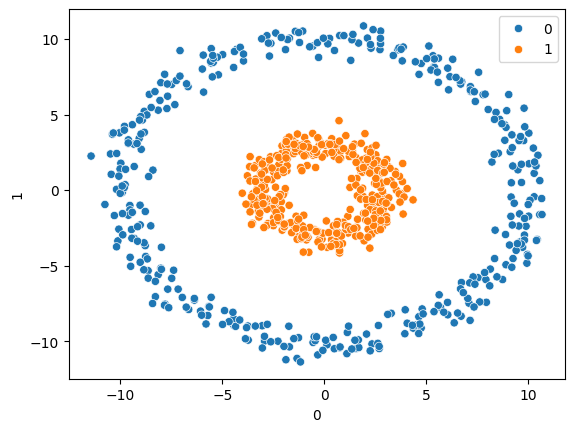

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, noise=0.06, factor=0.3, random_state=42)
X = pd.DataFrame(X*10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sns.scatterplot(x=X_train[0], y=X_train[1], hue=y_train)



Here in the above scatterplot, there are a lot of overlapping data points and it's nearly impossible to classify them using a straight line. Even we try to do it, the accuracy will be pathetic.

In [11]:
from sklearn.svm import SVC
svc = SVC(kernel='poly', degree=2)  # using linear for now

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, classification_report

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
cr = classification_report(y_true=y_test, y_pred=y_pred)

print(acc)
print(cr)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       121

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



### **63.2%** accuracy is there with linear model
### Let's try different kernels

## **Polynomial kernel**
The polynomial kernel is a function used in Support Vector Machines (SVMs) to handle data that is not linearly separable in its original form. It implicitly maps the input data into a higher-dimensional feature space where a linear decision boundary can effectively separate the different classes. 

The Mathematical tranformation used here is:

$$ K(x,y)=(\gamma \cdot x^{T}y+c_{0})^{d} $$
This will make the points converted into higher dimension

In [13]:
X.rename(columns={
    0: 'X1',
    1: 'X2'
}, inplace=True)

X['X1_sq'] = X['X1']**2
X['X2_sq'] = X['X2']**2
X['X1*X2'] = X['X1']*X['X2']


X

,X1,X2,X1_sq,X2_sq,X1*X2
0,2.534964,1.238675,6.426041,1.534316,3.139997
1,-2.296260,0.950894,5.272812,0.904200,-2.183501
2,-3.410348,1.836309,11.630470,3.372029,-6.262450
3,-2.339484,2.094904,5.473184,4.388622,-4.900993
4,4.472995,-8.940416,20.007686,79.931041,-39.990439
...,...,...,...,...,...
995,2.516092,9.166187,6.330719,84.018975,23.062969
996,-9.887270,-2.960566,97.758112,8.764952,29.271917
997,-0.302050,-3.430502,0.091234,11.768346,1.036184
998,6.561760,-8.060344,43.056697,64.969153,-52.890048


In [14]:
import plotly.express as px

px.scatter_3d(X, x='X1_sq', y='X2_sq', z='X1*X2', color=y)

# Ignore the error!


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'X1_sq=%{x}<br>X2_sq=%{y}<br>X1*X2=%{z}<br>color=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AQEBAQABAQEBAAEAAQEBAQABAQABAA' ... 'EAAQEAAAAAAAAAAAEAAQAAAAEAAA=='),
                                   'dtype': 'i1'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('o0z7F0S0GUDWEk7yWxcVQJqCVwXNQi' ... 'MRIVu3P+gr59hBh0VAKay4rmK2HkA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('doxRIo+M+D9OelsdNe/sP9dgM2Lq+Q' ... 'ujZIknQBu0JpwGPlBAyXCXOe16V0A='),
                    'dtype': 'f8'},
              'z': {'bdata': ('yhb1i7YeCUD+2rZrz3cBwGf/uMm/DB' ... 'NCNZTwP7nG6RXtcUrA89Z/aZvaOkA='),
                    'dtype': 'f8'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'X1_sq'}},
                         'yaxis': {'title': {'text': 'X2_sq'}},
                         'zaxis': {'title': {'text': 'X1*X2'}}},
               'template': '...'}
})

### Polynomial kernel makes the data point in higher dimension like this... Now these points can be clearly separable by a *plane*

In [15]:
svc = SVC(kernel='poly', degree=2) 

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
cr = classification_report(y_true=y_test, y_pred=y_pred)

print(acc)
print(cr)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       121

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



### The accuracy jumps to **100%** with this

## **RBF kernel**
The Radial Basis Function (RBF) kernel, or Gaussian kernel, is the most popular choice for Support Vector Machines (SVMs) when dealing with non-linear data. It measures the similarity between two points based on their distance, effectively creating "local" influence regions around each data point. 

The Mathematical tranformation used here is:

$$ K(x,y)=\exp (-\gamma \|x-y\|^{2}) $$
This will make the points converted into higher dimension

![rbf](https://miro.medium.com/v2/resize:fit:1400/1*kO_kAQ32-qmT-iljdZdkrQ.png)

In [16]:
svc = SVC(kernel='rbf')

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
cr = classification_report(y_true=y_test, y_pred=y_pred)

print(acc)
print(cr)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       121

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



### Again we are getting **100%** accuracy with this kernel